<a href="https://colab.research.google.com/github/subisan5081/-Excel-Automation-Toolkit-for-Data-Management-/blob/main/stockPrisePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MINI PROJECT_STOCK/New York Stock Exchange/prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


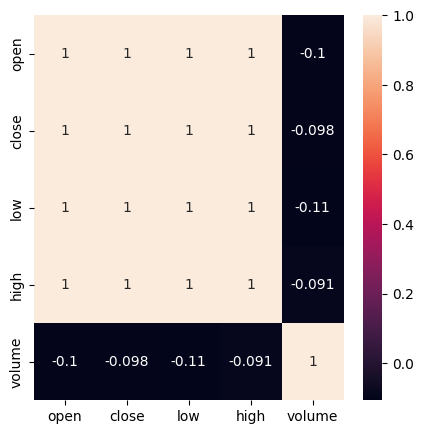

In [ ]:
df = df[df['symbol'] == 'AAP']   # Choosing stock values for any company

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

cormap = numeric_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cormap, annot=True)
plt.show()


In [ ]:
def get_corelated_col(cor_dat, threshold):
  # Cor_data to be column along which corelation to be measured
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [ ]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [ ]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [ ]:
df.shape

(1762, 4)

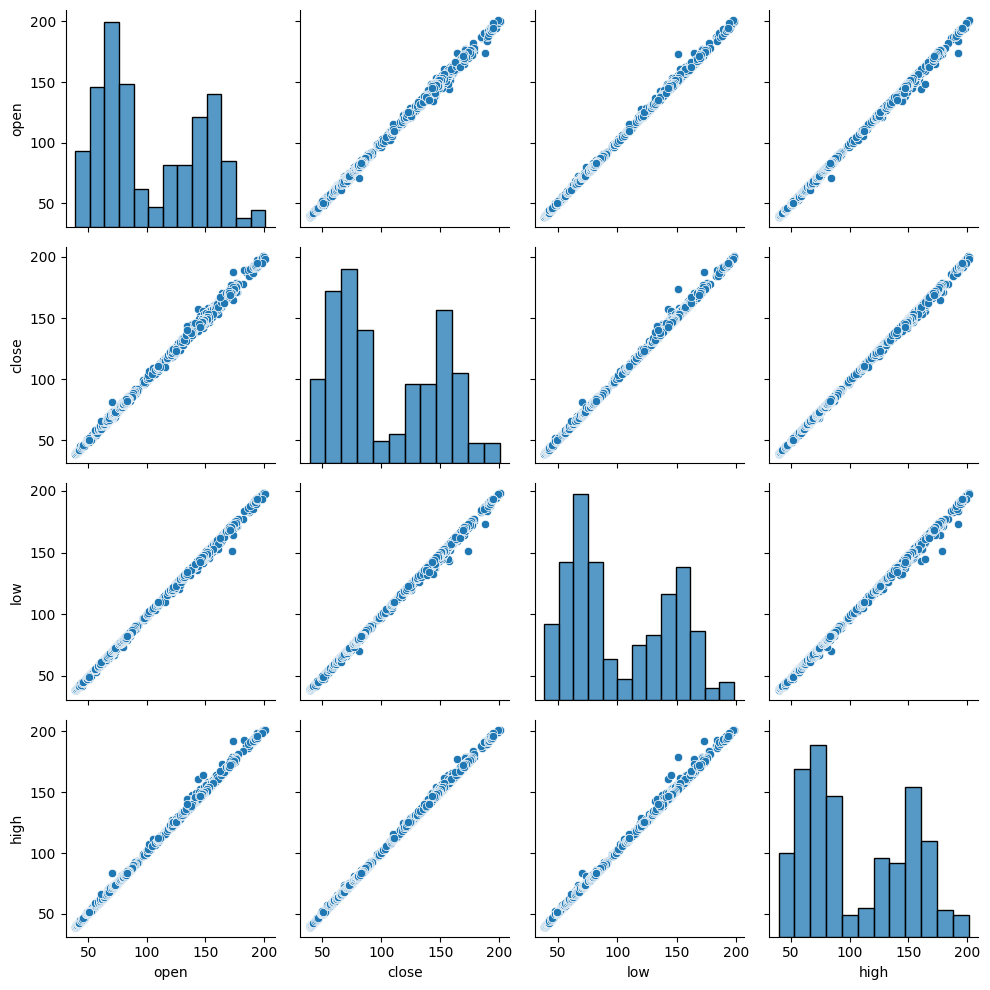

In [ ]:
sns.pairplot(df)
plt.tight_layout()

In [ ]:
X = df.drop(['close'], axis=1)
y = df['close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [ ]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Model Creation

def regressor(inp_dim):

    model = Sequential()

    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5951.6177 - val_loss: 22087.0586
Epoch 2/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6034.6567 - val_loss: 22029.7207
Epoch 3/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6011.8232 - val_loss: 21788.5371
Epoch 4/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5700.8408 - val_loss: 21027.8789
Epoch 5/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5514.8633 - val_loss: 19233.6016
Epoch 6/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4863.1787 - val_loss: 15927.9629
Epoch 7/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3847.7014 - val_loss: 11084.1055
Epoch 8/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2275.7737 - val_loss: 5740.3545
Epoch 9/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 945.6564 - val_loss: 1996.6345
Epoch 10/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189.8863 - val_loss: 571.9413
Epoch 11/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.4970 - val_loss: 285.2572
Epoch 12/70
36/36 

In [ ]:
# Prediction

y_pred_2 = model_2.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,177.688263
1,185.770004,178.942520
2,187.839996,180.293564
3,184.449997,181.476685
4,177.539993,182.166626


In [ ]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9868456132275913


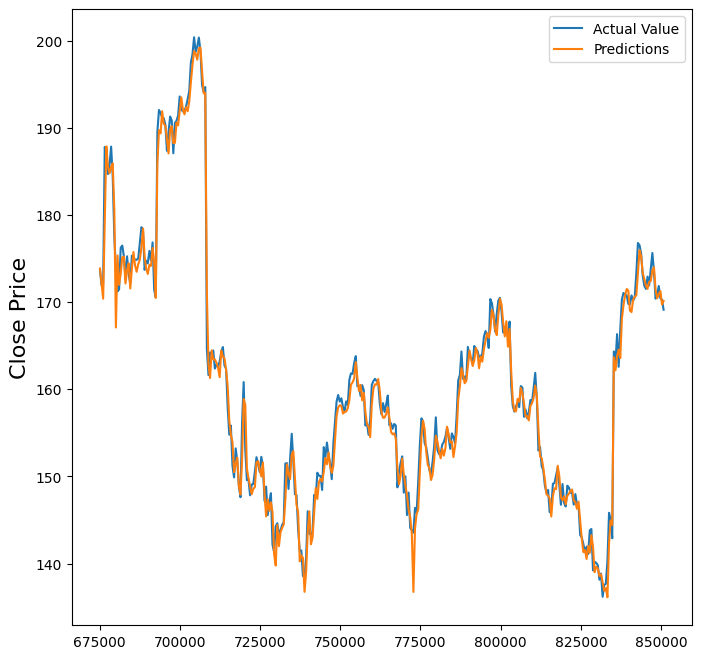

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():

    model = Sequential()

    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5465.9648 - val_loss: 73.7957
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 223.5266 - val_loss: 43.3433
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2722 - val_loss: 8.1278
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7759 - val_loss: 1.7527
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4773 - val_loss: 1.7215
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4618 - val_loss: 1.7245
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5513 - val_loss: 1.8877
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5088 - val_loss: 1.7628
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4777 - val_loss: 1.8731
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4518 - val_loss: 1.7485
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4157 - val_loss: 1.7002
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4484 

In [ ]:

# Prediction

y_pred_3 = model_3.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,175.175858
675608,171.919998,173.549408
676105,172.000000,171.729660
676602,187.789993,180.647964
677099,187.029999,189.438431


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9865073216234195


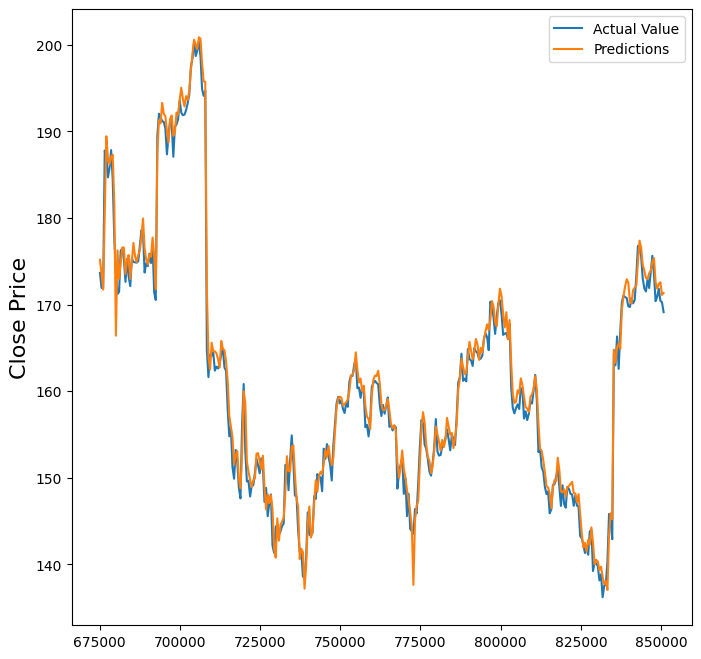

In [ ]:

plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

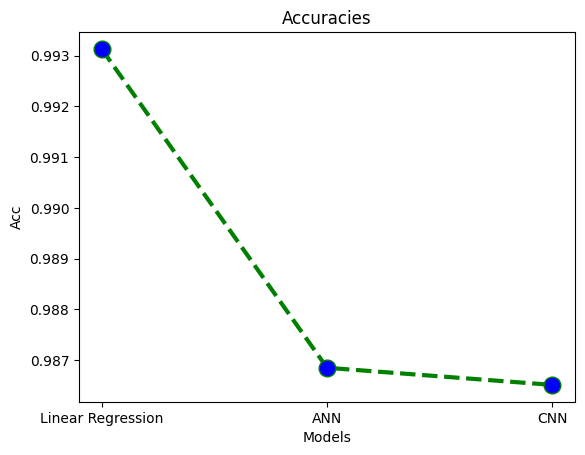

In [ ]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

In [ ]:
close = df.reset_index()['close']
close.head()

,close
0,40.380001
1,40.139999
2,40.490002
3,40.480000
4,40.639999


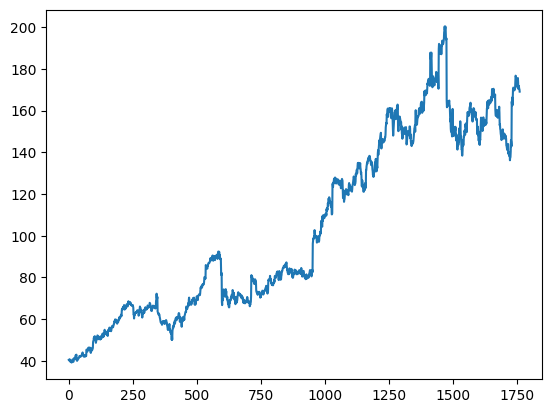

In [ ]:
plt.plot(close)
plt.show()

In [ ]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [ ]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [ ]:
y[:5]

array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:

X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()

    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:
model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5127.6895 - val_loss: 223.6068
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 203.7097 - val_loss: 213.0733
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 20.2651 - val_loss: 58.3665
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.0129 - val_loss: 47.3837
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 16.0135 - val_loss: 44.9528
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.6755 - val_loss: 43.3911
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 14.4917 - val_loss: 45.9205
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 16.1247 - val_loss: 40.3690
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 14.4017 - val_loss: 48.2316
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.0533 - val_loss: 45.8759
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 15.2919 - val_loss: 31.2033
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_1 = model_1.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,175.910065
1,185.770004,177.980209
2,187.839996,179.300568
3,184.449997,180.531113
4,177.539993,180.490967


In [ ]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.8591380284157577


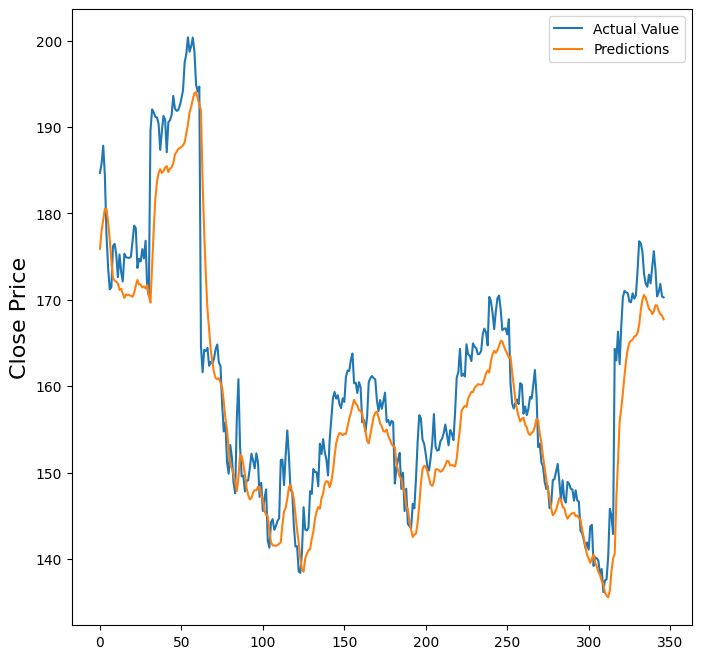

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6281.9321 - val_loss: 22364.8438
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6304.2944 - val_loss: 21624.0820
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5827.7739 - val_loss: 17757.2656
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4970.2720 - val_loss: 7950.3267
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2266.7358 - val_loss: 43.9718
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 344.0048 - val_loss: 1957.3856
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 228.0751 - val_loss: 1408.6515
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 216.2093 - val_loss: 1380.7738
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205.0400 - val_loss: 1253.1543
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 181.8872 - val_loss: 1264.5316
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 174.3587 - val_loss: 1158.0420
Epoch 12/100


In [ ]:
y_pred_2 = model_2.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.8081475630420171


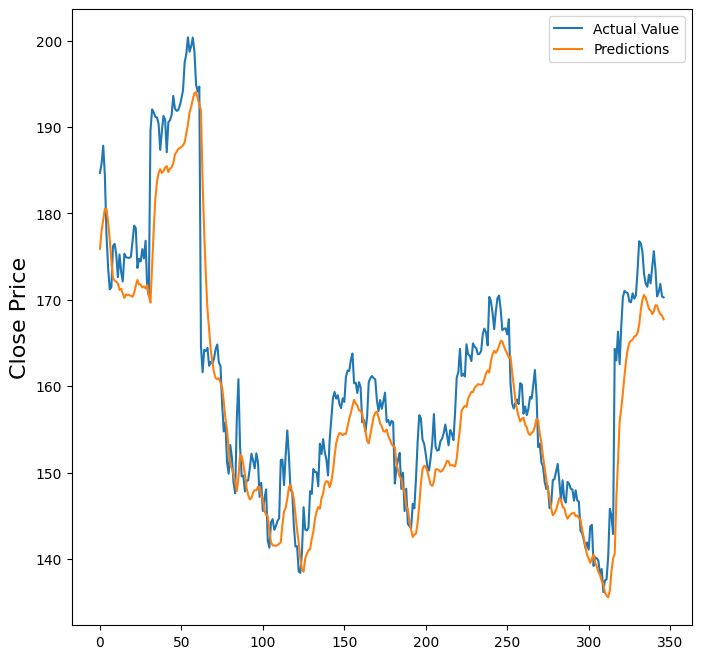

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 5188.7354 - val_loss: 35.3834
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 149.9898 - val_loss: 114.2560
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.7826 - val_loss: 35.7580
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.5793 - val_loss: 34.9525
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 17.1704 - val_loss: 40.2868
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.5463 - val_loss: 40.1735
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.0001 - val_loss: 31.3927
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 16.3896 - val_loss: 32.8828
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 14.7985 - val_loss: 37.5781
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 15.0585 - val_loss: 30.6036
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 14.9667 - val_loss: 33.9075
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_3 = model_3.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,179.219727
1,185.770004,181.061722
2,187.839996,182.462006
3,184.449997,184.028381
4,177.539993,184.608871


In [ ]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.864988629328407


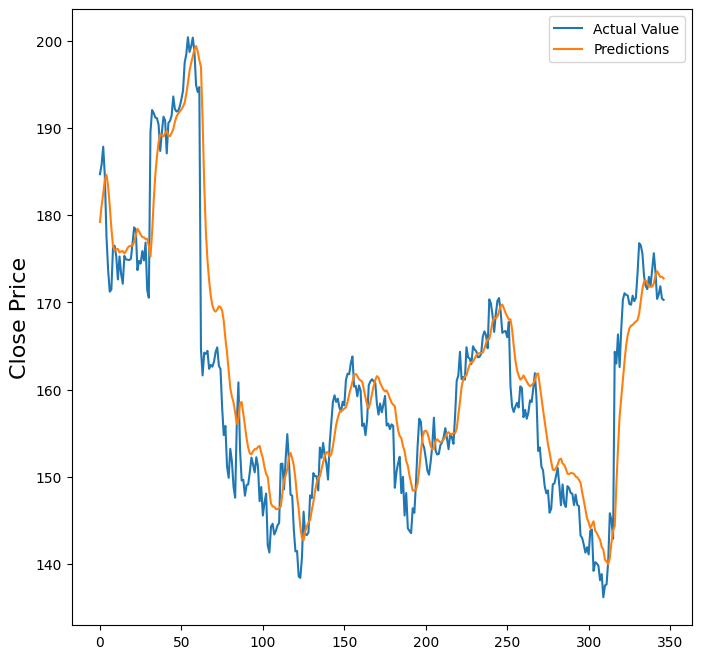

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

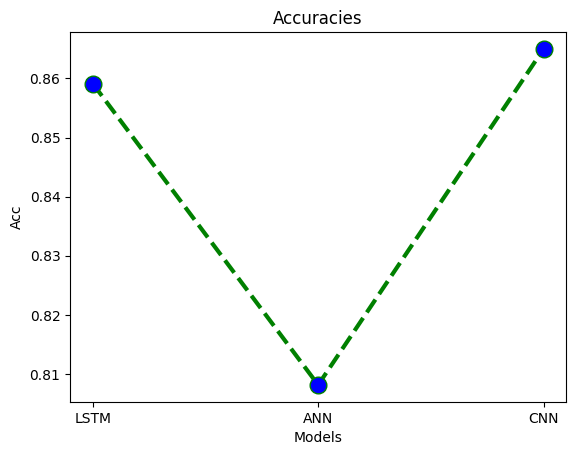

In [ ]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()